In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import math
import pickle
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/My Drive/filtered6_dataset.csv"

# Load Data

In [ ]:
# Load the csv file
df = pd.read_csv(file_path)
df

,peak_amplitude,rise_time,fall_time,peak_interval,max_amplitude,min_amplitude,mean_amplitude,area,FWHM,energy,...,total_power,dominant_frequency,fft1,fft2,fft3,fft4,fft5,power_ratio,subject_id,label
0,0.180077,0.218750,0.421875,0.640625,0.182377,-0.129712,0.035568,7.611720,0.234375,0.952541,...,0.005288,1.560976,2.916588,5.748035,1.265770,0.279039,0.107661,4.196146,S001,N
1,0.116188,0.218750,0.421875,0.640625,0.116940,-0.142917,-0.011494,6.401779,0.187500,0.632139,...,0.004130,1.560976,0.942475,4.903048,1.170524,0.241586,0.010196,3.693372,S001,N
2,0.121023,0.218750,0.421875,0.648438,0.121389,-0.140039,-0.005806,6.333089,0.195312,0.619593,...,0.004146,1.560976,0.476099,4.853160,1.269356,0.336398,0.088376,3.344450,S001,N
3,0.138627,0.171875,0.328125,0.500000,0.139091,-0.075619,0.046283,4.516074,0.218750,0.440520,...,0.001843,2.000000,2.962109,3.009263,0.748133,0.258063,0.116591,3.100019,S001,N
4,0.068806,0.171875,0.328125,0.781250,0.069293,-0.078520,-0.000457,2.713990,0.156250,0.146076,...,0.001081,2.000000,0.029221,2.115377,0.439297,0.044651,0.016416,2.799579,S001,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202383,0.499998,0.226562,0.437500,0.734375,0.499998,-0.359638,0.019270,17.218056,0.140625,5.511694,...,0.040839,1.505882,1.637929,12.890518,7.828788,2.320222,0.230425,3.690086,S118,N
202384,0.550178,0.250000,0.476562,0.726562,0.550178,-0.391033,0.022467,19.873999,0.156250,7.070209,...,0.053460,1.376344,2.089437,14.987465,9.752007,2.597727,0.096489,4.069932,S118,N
202385,0.502216,0.250000,0.476562,0.726562,0.502216,-0.390489,-0.019317,19.858934,0.140625,6.572488,...,0.049566,1.376344,1.796471,14.453389,9.242147,3.022286,0.498451,4.203525,S118,N
202386,0.353672,0.234375,0.445312,0.679688,0.353672,-0.475695,-0.049775,14.960191,0.125000,4.601866,...,0.028173,2.942529,4.330394,8.686023,10.318711,2.294286,0.902660,5.407155,S118,N


In [ ]:
# Check the label distribution
df['label'].value_counts()

,count
label,
N,185476
S,9297
V,7615


# Scale

In [ ]:
from sklearn.preprocessing import StandardScaler

variables_used = df.iloc[:,:-2] #no target

scaler = StandardScaler().fit(variables_used) # No target
scaled_df = pd.DataFrame(scaler.transform(variables_used))
scaled_df.columns = variables_used.columns

scaled_df.tail()

,peak_amplitude,rise_time,fall_time,peak_interval,max_amplitude,min_amplitude,mean_amplitude,area,FWHM,energy,...,kurtosis,entropy,total_power,dominant_frequency,fft1,fft2,fft3,fft4,fft5,power_ratio
202383,0.115793,-0.313619,-0.262530,-0.091453,-0.279037,0.442331,0.003452,-0.503430,-0.609704,-0.413688,...,0.133323,-0.238617,-0.361320,-0.176159,-0.497075,-0.416768,-0.267961,-0.395325,-0.568033,-0.086257
202384,0.199018,0.041740,0.056919,-0.122778,-0.206094,0.398296,0.017504,-0.424494,-0.487979,-0.391294,...,0.271848,0.097535,-0.334111,-0.389061,-0.467502,-0.327067,-0.113126,-0.351551,-0.604489,-0.084156
202385,0.119471,0.041740,0.056919,-0.122778,-0.275814,0.399059,-0.166142,-0.424942,-0.609704,-0.398446,...,0.286549,-0.015070,-0.342504,-0.389061,-0.486691,-0.349913,-0.154174,-0.284580,-0.495079,-0.083418
202386,-0.126894,-0.195166,-0.198640,-0.310724,-0.491741,0.279547,-0.300008,-0.570536,-0.731428,-0.426762,...,0.960099,0.116681,-0.388626,2.185042,-0.320720,-0.596622,-0.067502,-0.399416,-0.385058,-0.076763
202387,0.399251,-0.195166,-0.198640,-0.046246,-0.025775,0.574028,0.759528,-0.297886,-0.244531,-0.354612,...,-0.094742,0.028970,-0.348995,-0.233055,0.485731,-0.349265,-0.243900,-0.462108,-0.479117,-0.090334


In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

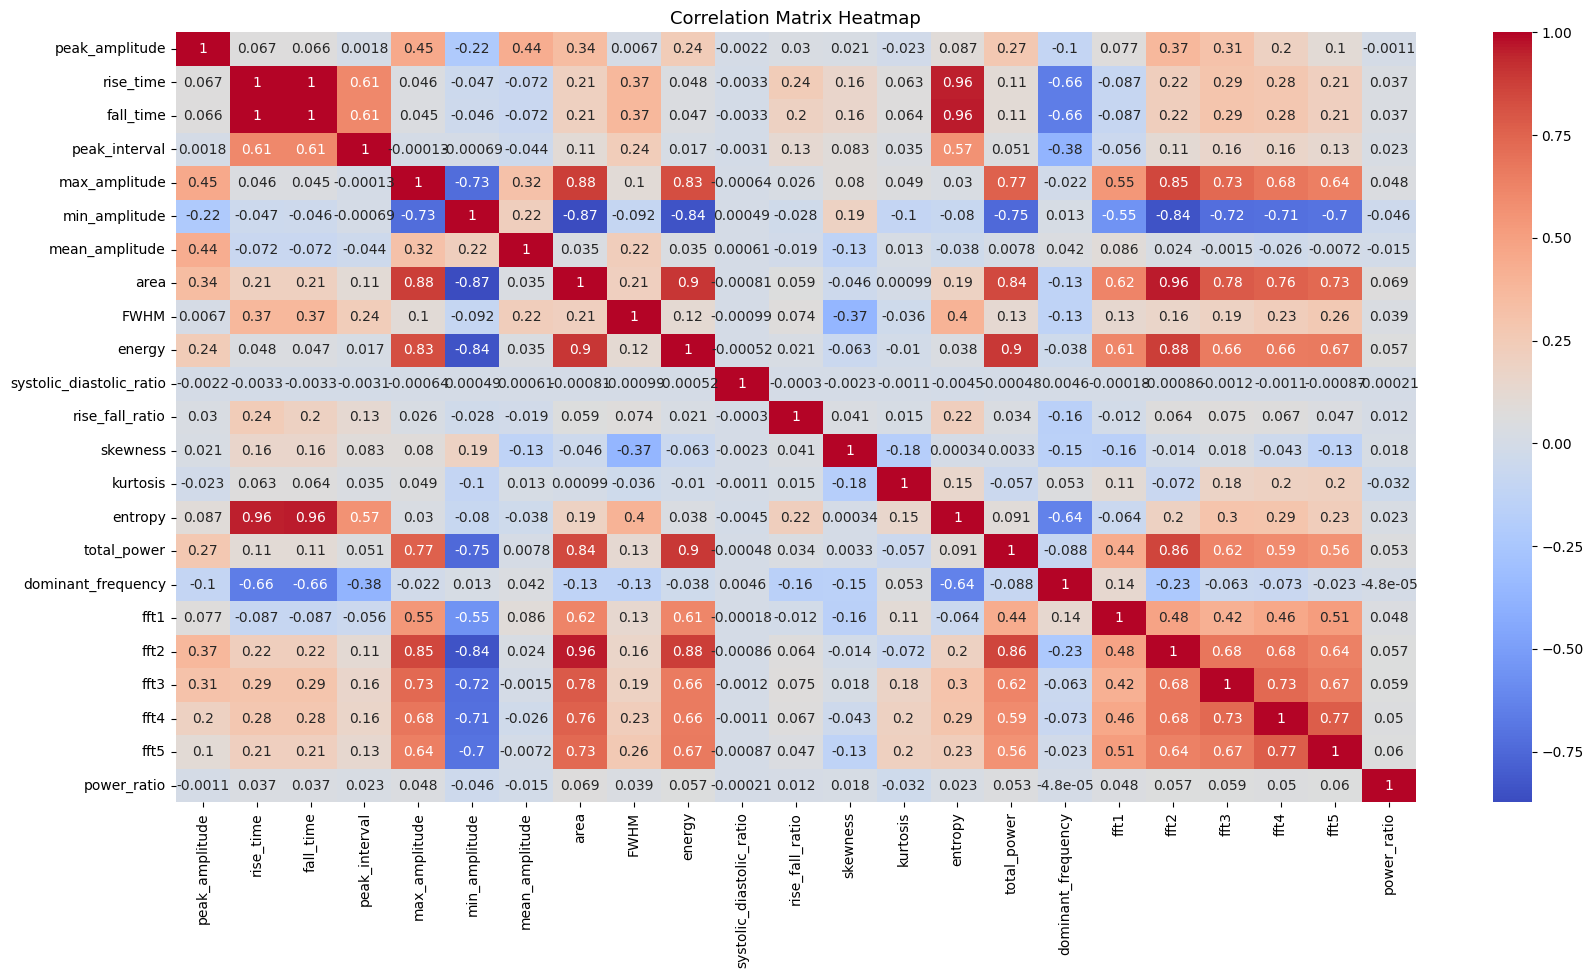

In [ ]:
# Visualize correlation among features
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap', fontsize=13)
    plt.show()


# Plot correlation matrix
average_correlation = plot_correlation_matrix(scaled_df)

In [ ]:
df = pd.concat([scaled_df, df['label'], df['subject_id']], axis=1)
df

,peak_amplitude,rise_time,fall_time,peak_interval,max_amplitude,min_amplitude,mean_amplitude,area,FWHM,energy,...,total_power,dominant_frequency,fft1,fft2,fft3,fft4,fft5,power_ratio,label,subject_id
0,-0.414807,-0.432072,-0.390309,-0.467345,-0.740741,0.764831,0.075085,-0.788937,0.120642,-0.479199,...,-0.437963,-0.085610,-0.413324,-0.722299,-0.796337,-0.717305,-0.601448,-0.083459,N,S001
1,-0.520770,-0.432072,-0.390309,-0.467345,-0.835862,0.746310,-0.131758,-0.824898,-0.244531,-0.483803,...,-0.440459,-0.085610,-0.542627,-0.758444,-0.804005,-0.723213,-0.627977,-0.086238,N,S001
2,-0.512751,-0.432072,-0.390309,-0.436021,-0.829395,0.750346,-0.106760,-0.826939,-0.183669,-0.483983,...,-0.440423,-0.085610,-0.573175,-0.760578,-0.796048,-0.708257,-0.606697,-0.088168,N,S001
3,-0.483554,-1.142789,-1.156986,-1.031184,-0.803662,0.840704,0.122178,-0.880942,-0.001082,-0.486556,...,-0.445389,0.635949,-0.410342,-0.839454,-0.838011,-0.720614,-0.599017,-0.089519,N,S001
4,-0.599355,-1.142789,-1.156986,0.096493,-0.905123,0.836635,-0.083248,-0.934501,-0.487979,-0.490787,...,-0.447033,0.635949,-0.602445,-0.877691,-0.862875,-0.754278,-0.626284,-0.091180,S,S001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202383,0.115793,-0.313619,-0.262530,-0.091453,-0.279037,0.442331,0.003452,-0.503430,-0.609704,-0.413688,...,-0.361320,-0.176159,-0.497075,-0.416768,-0.267961,-0.395325,-0.568033,-0.086257,N,S118
202384,0.199018,0.041740,0.056919,-0.122778,-0.206094,0.398296,0.017504,-0.424494,-0.487979,-0.391294,...,-0.334111,-0.389061,-0.467502,-0.327067,-0.113126,-0.351551,-0.604489,-0.084156,N,S118
202385,0.119471,0.041740,0.056919,-0.122778,-0.275814,0.399059,-0.166142,-0.424942,-0.609704,-0.398446,...,-0.342504,-0.389061,-0.486691,-0.349913,-0.154174,-0.284580,-0.495079,-0.083418,N,S118
202386,-0.126894,-0.195166,-0.198640,-0.310724,-0.491741,0.279547,-0.300008,-0.570536,-0.731428,-0.426762,...,-0.388626,2.185042,-0.320720,-0.596622,-0.067502,-0.399416,-0.385058,-0.076763,N,S118


In [ ]:
# One-hot encode the labels
df = pd.get_dummies(df, columns=['label'])
df

,peak_amplitude,rise_time,fall_time,peak_interval,max_amplitude,min_amplitude,mean_amplitude,area,FWHM,energy,...,fft1,fft2,fft3,fft4,fft5,power_ratio,subject_id,label_N,label_S,label_V
0,-0.414807,-0.432072,-0.390309,-0.467345,-0.740741,0.764831,0.075085,-0.788937,0.120642,-0.479199,...,-0.413324,-0.722299,-0.796337,-0.717305,-0.601448,-0.083459,S001,True,False,False
1,-0.520770,-0.432072,-0.390309,-0.467345,-0.835862,0.746310,-0.131758,-0.824898,-0.244531,-0.483803,...,-0.542627,-0.758444,-0.804005,-0.723213,-0.627977,-0.086238,S001,True,False,False
2,-0.512751,-0.432072,-0.390309,-0.436021,-0.829395,0.750346,-0.106760,-0.826939,-0.183669,-0.483983,...,-0.573175,-0.760578,-0.796048,-0.708257,-0.606697,-0.088168,S001,True,False,False
3,-0.483554,-1.142789,-1.156986,-1.031184,-0.803662,0.840704,0.122178,-0.880942,-0.001082,-0.486556,...,-0.410342,-0.839454,-0.838011,-0.720614,-0.599017,-0.089519,S001,True,False,False
4,-0.599355,-1.142789,-1.156986,0.096493,-0.905123,0.836635,-0.083248,-0.934501,-0.487979,-0.490787,...,-0.602445,-0.877691,-0.862875,-0.754278,-0.626284,-0.091180,S001,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202383,0.115793,-0.313619,-0.262530,-0.091453,-0.279037,0.442331,0.003452,-0.503430,-0.609704,-0.413688,...,-0.497075,-0.416768,-0.267961,-0.395325,-0.568033,-0.086257,S118,True,False,False
202384,0.199018,0.041740,0.056919,-0.122778,-0.206094,0.398296,0.017504,-0.424494,-0.487979,-0.391294,...,-0.467502,-0.327067,-0.113126,-0.351551,-0.604489,-0.084156,S118,True,False,False
202385,0.119471,0.041740,0.056919,-0.122778,-0.275814,0.399059,-0.166142,-0.424942,-0.609704,-0.398446,...,-0.486691,-0.349913,-0.154174,-0.284580,-0.495079,-0.083418,S118,True,False,False
202386,-0.126894,-0.195166,-0.198640,-0.310724,-0.491741,0.279547,-0.300008,-0.570536,-0.731428,-0.426762,...,-0.320720,-0.596622,-0.067502,-0.399416,-0.385058,-0.076763,S118,True,False,False


# Train/Test split

In [ ]:
# Separate the features and labels
X = df.drop(columns=['label_N', 'label_S', 'label_V'])
y = df[['label_N', 'label_S', 'label_V']]

In [ ]:
from collections import Counter

# Group data by subject
grouped = df.groupby('subject_id')

# Create the list for the subjects and the distribution of the classes for every subject
subjects = list(grouped.groups.keys())
subject_class_distribution = []

for subject in subjects:
    # Combine label_S and label_V in in Class 1, keeping label_N as Class 0
    label_counts = grouped.get_group(subject)[['label_N', 'label_S', 'label_V']].sum()
    label_counts['label_1'] = label_counts['label_S'] + label_counts['label_V']
    label_counts.drop(['label_S', 'label_V'], inplace=True)
    subject_class_distribution.append(label_counts)

subject_distribution_df = pd.DataFrame(subject_class_distribution).fillna(0)
subject_distribution_df['subject_id'] = subjects

# Order the subjects based on the proportion of the dominant class
subject_distribution_df['dominant_class'] = subject_distribution_df[['label_N', 'label_1']].idxmax(axis=1)
subject_distribution_df = subject_distribution_df.sort_values(by=['dominant_class', 'label_N', 'label_1'], ascending=False)

# Divide the subjects trying to keep the proportions
train_subjects = []
test_subjects = []
train_distribution = Counter()
test_distribution = Counter()

for _, row in subject_distribution_df.iterrows():
    subject = row['subject_id']
    class_counts = Counter(grouped.get_group(subject)[['label_N', 'label_S', 'label_V']].sum().to_dict())
    # Combine label_S and label_V in Class 1
    class_counts['label_1'] = class_counts['label_S'] + class_counts['label_V']
    del class_counts['label_S']
    del class_counts['label_V']

    if sum((train_distribution + class_counts).values()) <= len(df) * 0.7:
        train_subjects.append(subject)
        train_distribution += class_counts
    else:
        test_subjects.append(subject)
        test_distribution += class_counts

# Separate train and test data based on the selected subjects
train_df = df[df['subject_id'].isin(train_subjects)]
test_df = df[df['subject_id'].isin(test_subjects)]

# Separate features and labels
X_train = train_df.drop(columns=['label_N', 'label_S', 'label_V', 'subject_id'])
y_train = train_df[['label_N', 'label_S', 'label_V']].copy()
y_train['label_1'] = y_train['label_S'] + y_train['label_V']
y_train.drop(columns=['label_S', 'label_V'], inplace=True)

X_test = test_df.drop(columns=['label_N', 'label_S', 'label_V', 'subject_id'])
y_test = test_df[['label_N', 'label_S', 'label_V']].copy()
y_test['label_1'] = y_test['label_S'] + y_test['label_V']
y_test.drop(columns=['label_S', 'label_V'], inplace=True)

# Convert y_train and y_test in a unique array
y_train = y_train.idxmax(axis=1).map({'label_N': 0, 'label_1': 1}).astype(int)
y_test = y_test.idxmax(axis=1).map({'label_N': 0, 'label_1': 1}).astype(int)

In [ ]:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print("Train class distribution:")
print(f"Class 0 (Normal): {y_train.value_counts()[0]}")
print(f"Class 1 (Anomalous): {y_train.value_counts()[1]}")
print("Test class distribution:")
print(f"Class 0 (Normal): {y_test.value_counts()[0]}")
print(f"Class 1 (Anomalous): {y_test.value_counts()[1]}")

Train shape: (141599, 23), Test shape: (60789, 23)
Train class distribution:
Class 0 (Normal): 132886
Class 1 (Anomalous): 8713
Test class distribution:
Class 0 (Normal): 52590
Class 1 (Anomalous): 8199


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Models

In [ ]:
!pip install scikit-optimizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 1.2 MB/s eta 0:00:00


In [ ]:
import sys
sys.path.append('/content/drive/My Drive')

In [ ]:
import ml_functions as ml
import custom_bi as cm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold

### KNN

f1_train: 0.935343 using {'n_neighbors': 5}
f1         train 0.981   test 0.740
precision  train 0.964   test 0.818



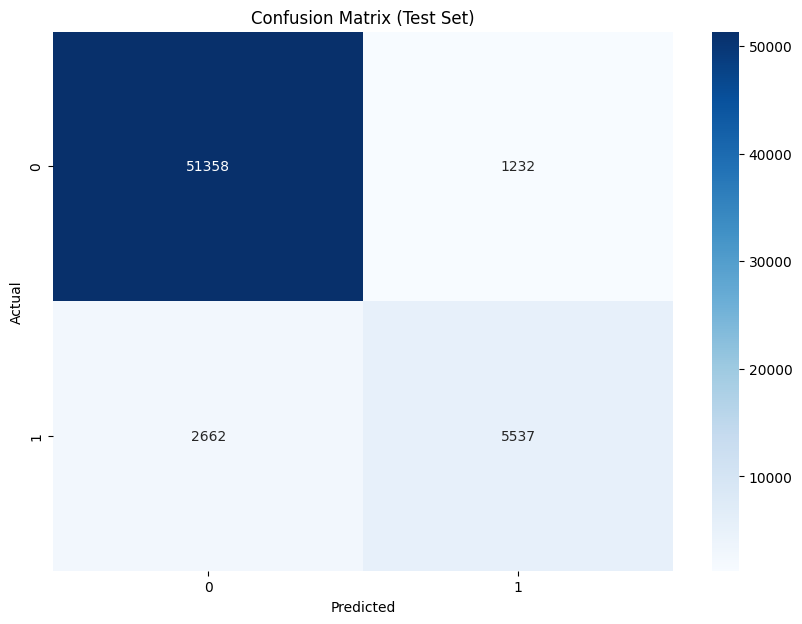

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':(5, 10, 25, 50, 100)}

best_model_knn = ml.hyperp_search(classifier,parameters, X_train, X_test, y_train, y_test)
best_params_knn = ml.params(best_model_knn)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Test set predictions
y_pred = best_model_knn.predict(X_test)

# Precision, recall, and F1-score computation
precision = round(precision_score(y_test, y_pred, average='macro'),2)
recall = round(recall_score(y_test, y_pred, average='macro'),2)
f1 = round(f1_score(y_test, y_pred, average='macro'),2)
custom = round(cm.custom_metric_binary(y_test, y_pred),2)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Custom Metric: {custom}")

Precision: 0.88
Recall: 0.83
F1 Score: 0.85
Custom Metric: 0.68


In [ ]:
# Compute precision, recall, and F1-score of each class
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)
custom_per_class = cm.custom_metric_binary(y_test, y_pred)


# Visualize the results
for i, (precision, recall, f1) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
    print(f"Class {i}:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Custom Metric: {custom}")
    print("\n")

Class 0:
Precision: 0.9507219548315439
Recall: 0.976573493059517
F1 Score: 0.9634743457461777
Custom Metric: 0.68


Class 1:
Precision: 0.8179937952430196
Recall: 0.6753262592999146
F1 Score: 0.7398450026723676
Custom Metric: 0.68




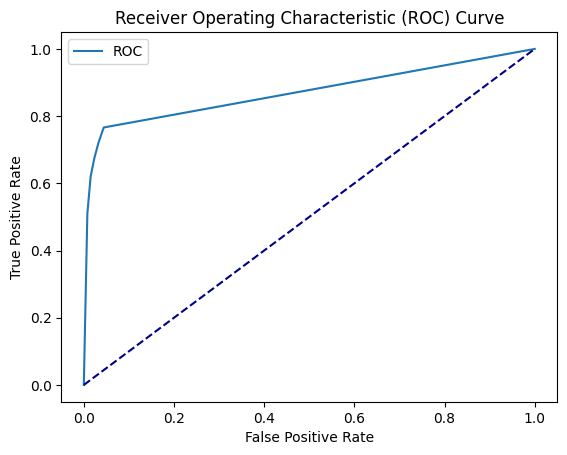

AUC: 0.87


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'])

fpr_knn,tpr_knn=ml.roc(model_knn,X_train,y_train,X_test,y_test)

In [ ]:
y_pred_proba = best_model_knn.predict_proba(X_test)

# Ottieni la classe predetta
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Inizializza un dizionario per memorizzare i confidence scores per classe
class_confidences = {}

# Raggruppa i confidence scores per classe predetta
for cls in np.unique(y_pred_classes):
    # Estrai i confidence scores per la classe attuale
    confs = y_pred_proba[y_pred_classes == cls, cls]
    class_confidences[cls] = confs

# Calcola e stampa le statistiche per ciascuna classe
for cls, confs in class_confidences.items():
    mean_confidence = np.mean(confs)
    std_confidence = np.std(confs)
    min_confidence = np.min(confs)
    max_confidence = np.max(confs)
    print(f"Classe {cls}:")
    print(f"  Mean Confidence: {mean_confidence:.2f}")
    print(f"  Std Confidence: {std_confidence:.2f}")
    print(f"  Min Confidence: {min_confidence:.2f}")
    print(f"  Max Confidence: {max_confidence:.2f}")

Classe 0:
  Mean Confidence: 0.99
  Std Confidence: 0.06
  Min Confidence: 0.60
  Max Confidence: 1.00
Classe 1:
  Mean Confidence: 0.91
  Std Confidence: 0.14
  Min Confidence: 0.60
  Max Confidence: 1.00


### Tree

f1_train: 0.946429 using {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
f1         train 0.971   test 0.761
precision  train 0.963   test 0.887



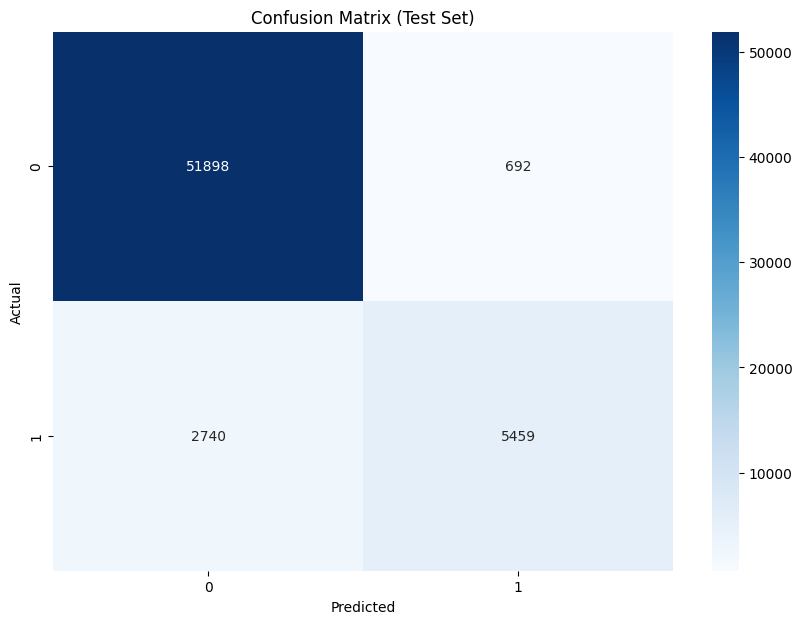

In [ ]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(class_weight='balanced')
parameters = {'criterion': ['entropy','gini'],
              'max_depth': [4,5,6,8,10],
              'min_samples_split': [5,10,20],
              'min_samples_leaf': [5,10,20]}

best_model_tree = ml.hyperp_search(classifier,parameters, X_train, X_test, y_train, y_test)
best_params_tree = ml.params(best_model_tree)

In [ ]:
# Test set predictions
y_pred = best_model_tree.predict(X_test)

# Precision, recall, and F1-score computation
precision = round(precision_score(y_test, y_pred, average='macro'),2)
recall = round(recall_score(y_test, y_pred, average='macro'),2)
f1 = round(f1_score(y_test, y_pred, average='macro'),2)
custom = round(cm.custom_metric_binary(y_test, y_pred),2)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Custom Metric: {custom}")

Precision: 0.92
Recall: 0.83
F1 Score: 0.86
Custom Metric: 0.67


In [ ]:
# Compute precision, recall, and F1-score for each class
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)
custom_per_class = cm.custom_metric_binary(y_test, y_pred)

for i, (precision, recall, f1) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
    print(f"Class {i}:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Custom Metric: {custom}")
    print("\n")

Class 0:
Precision: 0.9498517515282404
Recall: 0.9868416048678456
F1 Score: 0.967993434550677
Custom Metric: 0.67


Class 1:
Precision: 0.8874979678101121
Recall: 0.6658129040126844
F1 Score: 0.7608362369337979
Custom Metric: 0.67




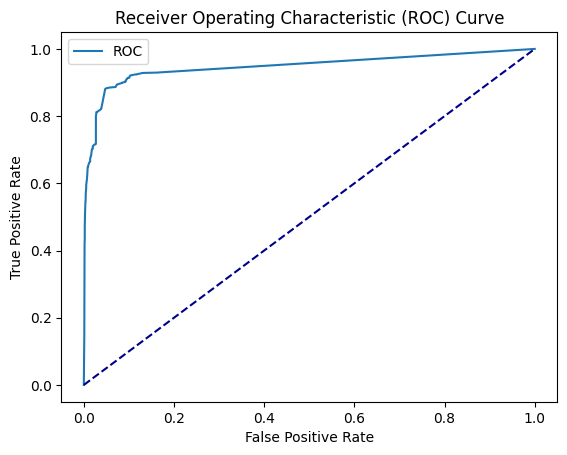

AUC: 0.95


In [ ]:
model_tree = DecisionTreeClassifier(criterion=best_params_tree['criterion'], max_depth=best_params_tree['max_depth'], min_samples_leaf=best_params_tree['min_samples_leaf'], min_samples_split=best_params_tree['min_samples_split'])

fpr_tree,tpr_tree=ml.roc(model_tree,X_train,y_train,X_test,y_test)

In [ ]:
y_pred_proba = best_model_knn.predict_proba(X_test)

# Ottieni la classe predetta
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Inizializza un dizionario per memorizzare i confidence scores per classe
class_confidences = {}

# Raggruppa i confidence scores per classe predetta
for cls in np.unique(y_pred_classes):
    # Estrai i confidence scores per la classe attuale
    confs = y_pred_proba[y_pred_classes == cls, cls]
    class_confidences[cls] = confs

# Calcola e stampa le statistiche per ciascuna classe
for cls, confs in class_confidences.items():
    mean_confidence = np.mean(confs)
    std_confidence = np.std(confs)
    min_confidence = np.min(confs)
    max_confidence = np.max(confs)
    print(f"Classe {cls}:")
    print(f"  Mean Confidence: {mean_confidence:.2f}")
    print(f"  Std Confidence: {std_confidence:.2f}")
    print(f"  Min Confidence: {min_confidence:.2f}")
    print(f"  Max Confidence: {max_confidence:.2f}")

Classe 0:
  Mean Confidence: 0.99
  Std Confidence: 0.06
  Min Confidence: 0.60
  Max Confidence: 1.00
Classe 1:
  Mean Confidence: 0.91
  Std Confidence: 0.14
  Min Confidence: 0.60
  Max Confidence: 1.00


### Naive Bayes

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.6711395750737014
f1_test:  0.6711395750737014
[[47717  4873]
 [ 1597  6602]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     52590
           1       0.58      0.81      0.67      8199

    accuracy                           0.89     60789
   macro avg       0.77      0.86      0.80     60789
weighted avg       0.91      0.89      0.90     60789



In [ ]:
# Precision, recall, and F1-score computation
precision = round(precision_score(y_test, y_pred, average='macro'),2)
recall = round(recall_score(y_test, y_pred, average='macro'),2)
f1 = round(f1_score(y_test, y_pred, average='macro'),2)
custom = round(cm.custom_metric_binary(y_test, y_pred),2)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Custom Metric: {custom}")

Precision: 0.77
Recall: 0.86
F1 Score: 0.8
Custom Metric: 0.81


In [ ]:
# Compute precision, recall, and F1-score for each class
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)
custom_per_class = cm.custom_metric_binary(y_test, y_pred)

for i, (precision, recall, f1) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
    print(f"Class {i}:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Custom Metric: {custom}")
    print("\n")

Class 0:
Precision: 0.9676156872287789
Recall: 0.9073397984407682
F1 Score: 0.9365088710943633
Custom Metric: 0.81


Class 1:
Precision: 0.5753376906318083
Recall: 0.805220148798634
F1 Score: 0.6711395750737014
Custom Metric: 0.81




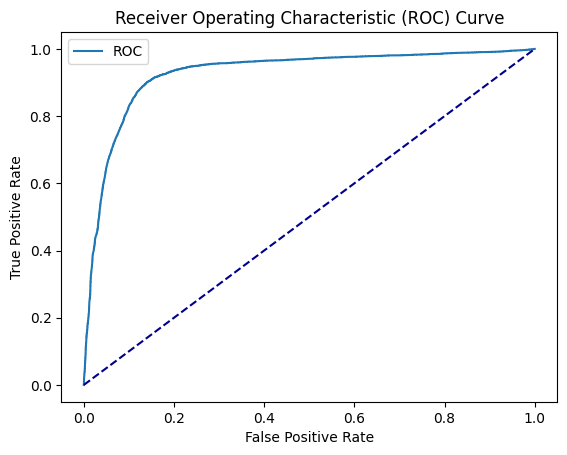

AUC: 0.93


In [ ]:
y_pred_proba = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case)

fpr_nb,tpr_nb=ml.roc(model,X_train,y_train,X_test,y_test)

In [ ]:
# Ottieni la classe predetta
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Inizializza un dizionario per memorizzare i confidence scores per classe
class_confidences = {}

# Raggruppa i confidence scores per classe predetta
for cls in np.unique(y_pred_classes):
    # Estrai i confidence scores per la classe attuale
    confs = y_pred_proba[y_pred_classes == cls, cls]
    class_confidences[cls] = confs

# Calcola e stampa le statistiche per ciascuna classe
for cls, confs in class_confidences.items():
    mean_confidence = np.mean(confs)
    std_confidence = np.std(confs)
    min_confidence = np.min(confs)
    max_confidence = np.max(confs)
    print(f"Classe {cls}:")
    print(f"  Mean Confidence: {mean_confidence:.2f}")
    print(f"  Std Confidence: {std_confidence:.2f}")
    print(f"  Min Confidence: {min_confidence:.2f}")
    print(f"  Max Confidence: {max_confidence:.2f}")

Classe 0:
  Mean Confidence: 1.00
  Std Confidence: 0.04
  Min Confidence: 0.50
  Max Confidence: 1.00
Classe 1:
  Mean Confidence: 0.98
  Std Confidence: 0.07
  Min Confidence: 0.50
  Max Confidence: 1.00


### Logistic Regression

f1_train: 0.928012 using {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
f1         train 0.935   test 0.787
precision  train 0.945   test 0.848



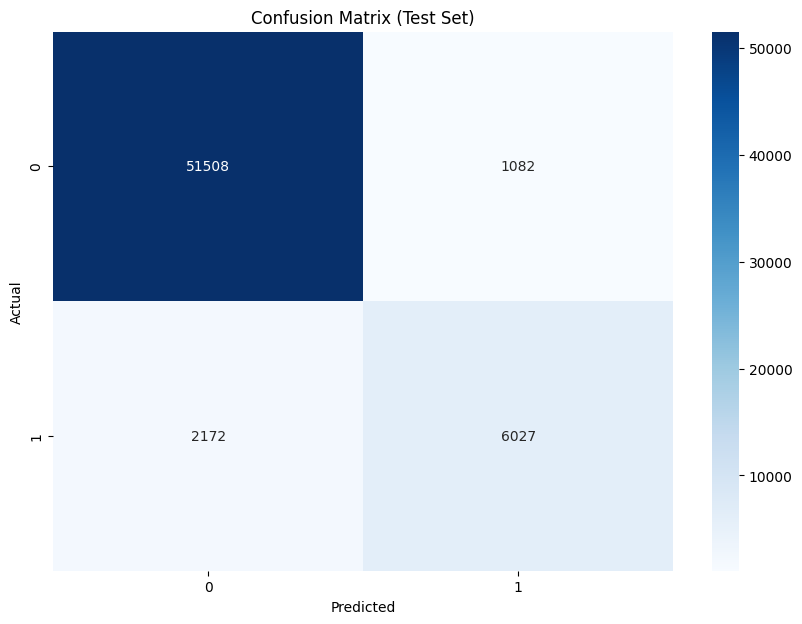

In [ ]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(class_weight='balanced', solver='liblinear')
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000, 5000, 10000], 'penalty': ['l1', 'l2']}


best_model_logistic = ml.hyperp_search(classifier,parameters, X_train, X_test, y_train, y_test)
best_params_logistic = ml.params(best_model_logistic)

In [ ]:
# Predici le etichette per i dati di test
y_pred = best_model_logistic.predict(X_test)

# Precision, recall, and F1-score computation
precision = round(precision_score(y_test, y_pred, average='macro'),2)
recall = round(recall_score(y_test, y_pred, average='macro'),2)
f1 = round(f1_score(y_test, y_pred, average='macro'),2)
custom = round(cm.custom_metric_binary(y_test, y_pred),2)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Custom Metric: {custom}")

Precision: 0.9
Recall: 0.86
F1 Score: 0.88
Custom Metric: 0.74


In [ ]:
# Compute precision, recall, and F1-score for each class
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)
custom_per_class = cm.custom_metric_binary(y_test, y_pred)

for i, (precision, recall, f1) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
    print(f"Class {i}:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Custom Metric: {custom}")
    print("\n")

Class 0:
Precision: 0.959538002980626
Recall: 0.9794257463396083
F1 Score: 0.969379881434083
Custom Metric: 0.74


Class 1:
Precision: 0.8477985651990435
Recall: 0.7350896450786681
F1 Score: 0.7874314084139012
Custom Metric: 0.74




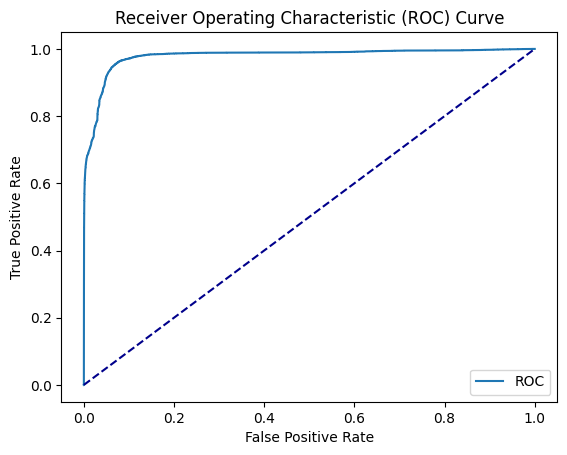

AUC: 0.98


In [ ]:
model = LogisticRegression(C=best_params_logistic['C'], max_iter=best_params_logistic['max_iter'])

fpr_lr,tpr_lr=ml.roc(model,X_train,y_train,X_test,y_test)

In [ ]:
model.fit(X_train,y_train)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

<ipython-input-40-c694723858d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")


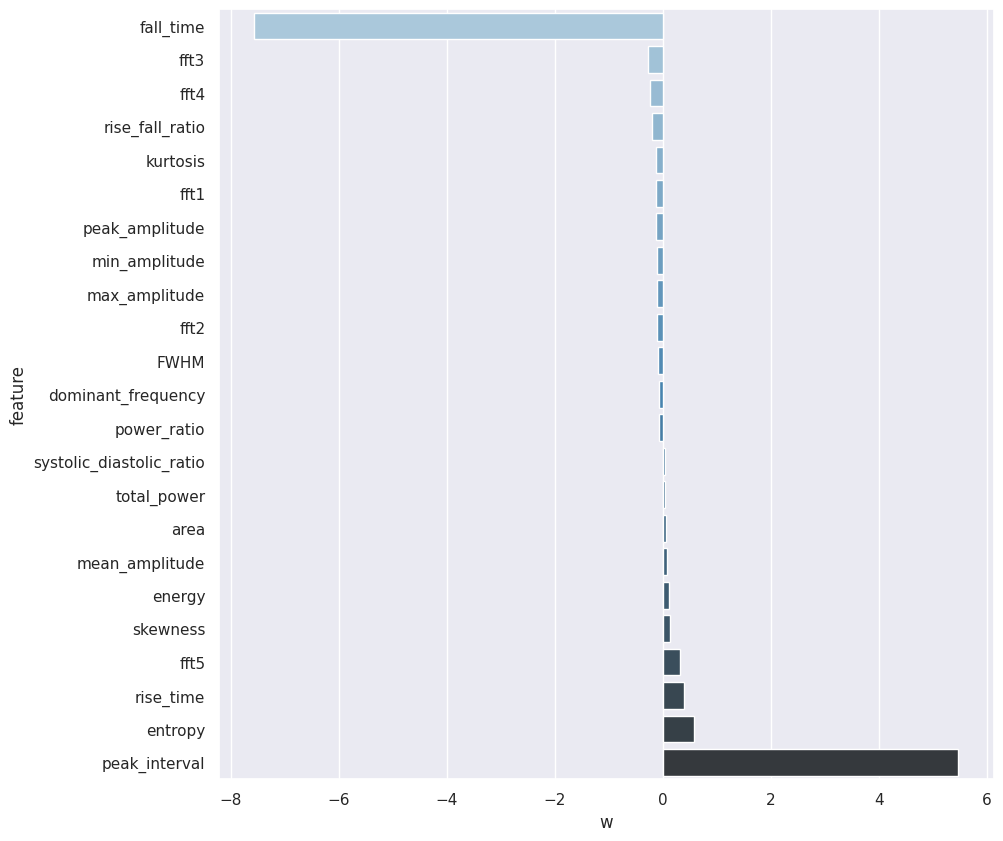

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})

In [ ]:
y_pred_proba = best_model_logistic.predict_proba(X_test)

# Ottieni la classe predetta
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Inizializza un dizionario per memorizzare i confidence scores per classe
class_confidences = {}

# Raggruppa i confidence scores per classe predetta
for cls in np.unique(y_pred_classes):
    # Estrai i confidence scores per la classe attuale
    confs = y_pred_proba[y_pred_classes == cls, cls]
    class_confidences[cls] = confs

# Calcola e stampa le statistiche per ciascuna classe
for cls, confs in class_confidences.items():
    mean_confidence = np.mean(confs)
    std_confidence = np.std(confs)
    min_confidence = np.min(confs)
    max_confidence = np.max(confs)
    print(f"Classe {cls}:")
    print(f"  Mean Confidence: {mean_confidence:.2f}")
    print(f"  Std Confidence: {std_confidence:.2f}")
    print(f"  Min Confidence: {min_confidence:.2f}")
    print(f"  Max Confidence: {max_confidence:.2f}")

Classe 0:
  Mean Confidence: 0.96
  Std Confidence: 0.11
  Min Confidence: 0.50
  Max Confidence: 1.00
Classe 1:
  Mean Confidence: 0.91
  Std Confidence: 0.16
  Min Confidence: 0.50
  Max Confidence: 1.00


### XGBoost

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


f1_train: 0.969567 using OrderedDict([('gamma', 0.0), ('lambda', 1.5), ('learning_rate', 0.3), ('max_depth', 6), ('n_estimators', 500), ('subsample', 1.0)])
f1         train 0.999   test 0.737
precision  train 0.999   test 0.950



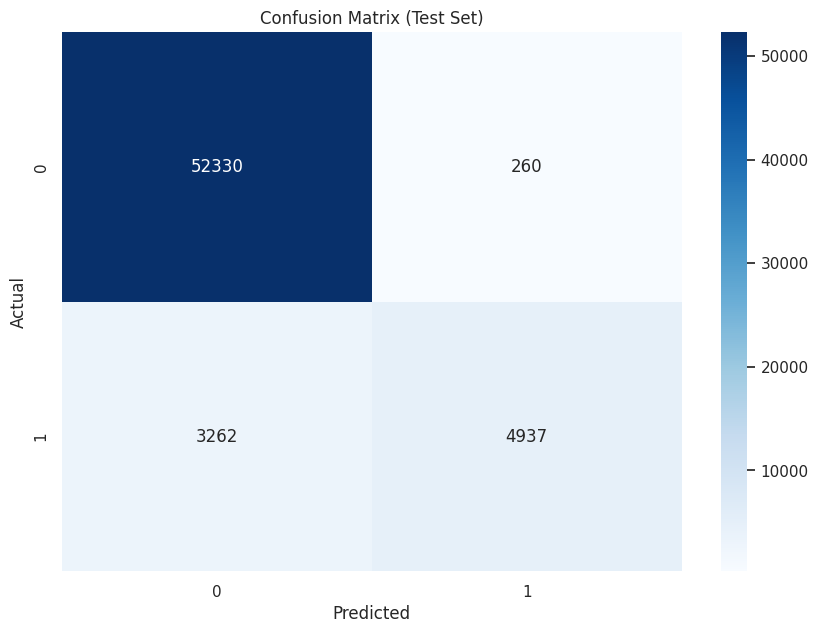

In [ ]:
# xgboost
from skopt.space import Real, Integer
import xgboost as xgb

xgboost = xgb.XGBClassifier()
param_space = {
    "gamma": Real(0, 0.5),
    "learning_rate": Real(0.01, 0.3), # default 0.1
    "max_depth": Integer(2, 6), # default 3
    "n_estimators": Integer(100, 500), # default 100
    "subsample": Real(0.5, 1.0),
    "lambda": Real(0.5, 1.5)
}

best_model_bayes = ml.bayesian_search(xgboost, param_space, X_train, X_test, y_train, y_test)
best_params_bayes = ml.params(best_model_bayes)

In [ ]:
y_pred = best_model_bayes.predict(X_test)

# Precision, recall, and F1-score computation
precision = round(precision_score(y_test, y_pred, average='macro'),2)
recall = round(recall_score(y_test, y_pred, average='macro'),2)
f1 = round(f1_score(y_test, y_pred, average='macro'),2)
custom = round(cm.custom_metric_binary(y_test, y_pred),2)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Custom Metric: {custom}")

Precision: 0.95
Recall: 0.8
F1 Score: 0.85
Custom Metric: 0.6


In [ ]:
# Compute precision, recall, and F1-score for each class
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)
custom_per_class = cm.custom_metric_binary(y_test, y_pred)

for i, (precision, recall, f1) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
    print(f"Class {i}:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Custom Metric: {custom}")
    print("\n")

Class 0:
Precision: 0.9413224924449561
Recall: 0.9950560943145085
F1 Score: 0.9674437521953745
Custom Metric: 0.6


Class 1:
Precision: 0.9499711371945353
Recall: 0.6021466032442981
F1 Score: 0.7370856972230517
Custom Metric: 0.6




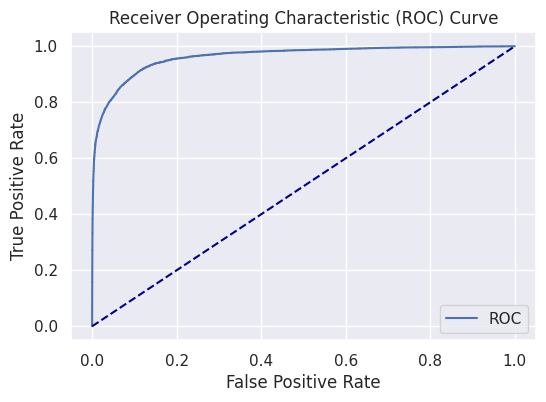

AUC: 0.96


In [ ]:
model_xgboost = xgb.XGBClassifier(gamma=best_params_bayes['gamma'], learning_rate=best_params_bayes['learning_rate'], max_depth=best_params_bayes['max_depth'], n_estimators=best_params_bayes['n_estimators'], subsample=best_params_bayes['subsample'], reg_lambda=best_params_bayes['lambda'])

fpr_xgb,tpr_xgb=ml.roc(model_xgboost,X_train,y_train,X_test,y_test)

In [ ]:
y_pred_proba = best_model_bayes.predict_proba(X_test)

# Ottieni la classe predetta
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Inizializza un dizionario per memorizzare i confidence scores per classe
class_confidences = {}

# Raggruppa i confidence scores per classe predetta
for cls in np.unique(y_pred_classes):
    # Estrai i confidence scores per la classe attuale
    confs = y_pred_proba[y_pred_classes == cls, cls]
    class_confidences[cls] = confs

# Calcola e stampa le statistiche per ciascuna classe
for cls, confs in class_confidences.items():
    mean_confidence = np.mean(confs)
    std_confidence = np.std(confs)
    min_confidence = np.min(confs)
    max_confidence = np.max(confs)
    print(f"Classe {cls}:")
    print(f"  Mean Confidence: {mean_confidence:.2f}")
    print(f"  Std Confidence: {std_confidence:.2f}")
    print(f"  Min Confidence: {min_confidence:.2f}")
    print(f"  Max Confidence: {max_confidence:.2f}")

Classe 0:
  Mean Confidence: 0.99
  Std Confidence: 0.04
  Min Confidence: 0.50
  Max Confidence: 1.00
Classe 1:
  Mean Confidence: 0.93
  Std Confidence: 0.12
  Min Confidence: 0.50
  Max Confidence: 1.00


## Comparison between all models

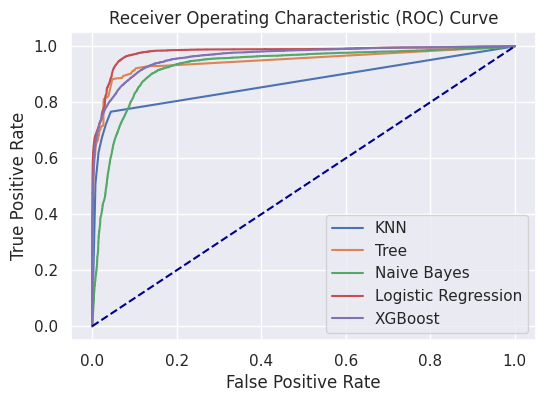

In [ ]:
plt.plot(fpr_knn, tpr_knn, label= "KNN")
plt.plot(fpr_tree, tpr_tree, label= "Tree")
plt.plot(fpr_nb, tpr_nb, label= "Naive Bayes")
plt.plot(fpr_lr, tpr_lr, label= "Logistic Regression")
plt.plot(fpr_xgb, tpr_xgb, label= "XGBoost")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()